Advantages of TensorFlow:

- Mature Ecosystem: TensorFlow has been around longer and has a more mature ecosystem. It has a wide range of libraries, tools, and resources, making it suitable for various applications.

- Deployment and Production: TensorFlow offers production-ready tools like TensorFlow Serving and TensorFlow Lite for deploying models to production environments and mobile devices.

- Scalability: TensorFlow provides distributed computing capabilities, including TensorFlow Distributed, TensorFlow Dataflow, and TensorFlow on Spark, making it well-suited for large-scale projects.

- High-Level APIs: TensorFlow provides high-level APIs like Keras (which is integrated into TensorFlow) that make it easy to build and experiment with neural network architectures.

- Graph Compilation: TensorFlow's static computation graph can lead to optimization opportunities and better performance for certain scenarios.

### Let's do a regression example!
 
 Let's predict fuel efficiency

In [1]:
#The imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow.keras.layers import Normalization
tf.compat.v1.enable_eager_execution()

2025-01-08 19:35:19.083907: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736364919.104864  940592 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736364919.111167  940592 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-08 19:35:19.132849: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#Let's download the data! MPG (miles per Gallon, feul efficiency)
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)


In [3]:
#Data cleaning
dataset = raw_dataset.copy()
dataset = dataset.dropna()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [4]:
#Let's convert origin to numeric value
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})


In [5]:
#pd.get_dummies is a function used for one-hot encoding categorical data. 
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,False,False,True
1,15.0,8,350.0,165.0,3693.0,11.5,70,False,False,True
2,18.0,8,318.0,150.0,3436.0,11.0,70,False,False,True
3,16.0,8,304.0,150.0,3433.0,12.0,70,False,False,True
4,17.0,8,302.0,140.0,3449.0,10.5,70,False,False,True


- One-Hot Encoding:

    - Distinct Representation: One-hot encoding creates a unique binary feature (0 or 1) for each category in a categorical variable. This distinct representation ensures that no category is considered more important than another, preventing the model from inferring an ordinal relationship between categories when there isn't one.

    - Interpretability: One-hot encoding is straightforward to interpret because each binary feature corresponds directly to a specific category. It makes it easy to understand which category is associated with a particular observation.

    - Non-linearity: One-hot encoding introduces non-linearity into the model, which can be beneficial when dealing with categorical variables that do not have a natural order or when interactions between categories are significant.

    - Suitable for Most Algorithms: One-hot encoding is compatible with a wide range of machine learning algorithms, including linear models, decision trees, random forests, and neural networks. It's a safe choice in many scenarios.

In [6]:
#let's split the data into training and testing!
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

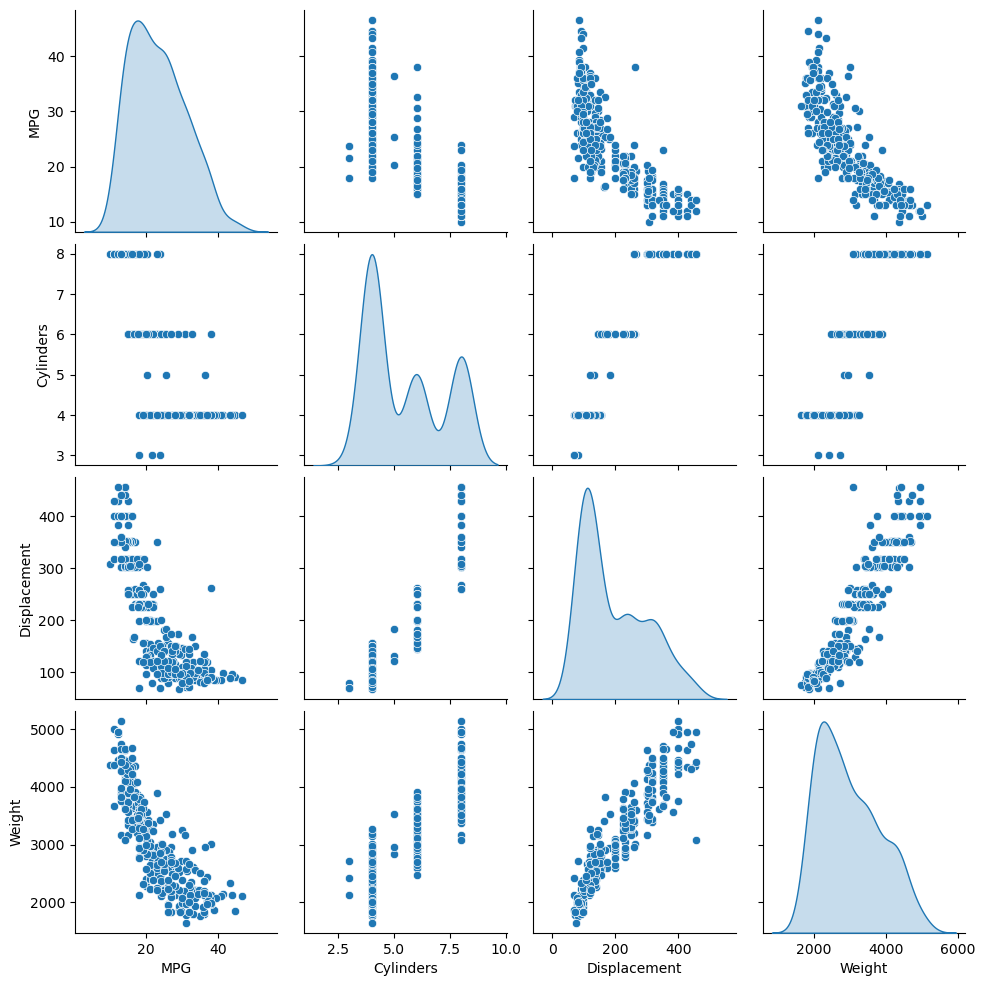

In [7]:
#Let's look at the data
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')

In [8]:
#Let's split the features (x) from the labels (y)
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

In [9]:
train_features

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
146,4,90.0,75.0,2125.0,14.5,74,False,False,True
282,4,140.0,88.0,2890.0,17.3,79,False,False,True
69,8,350.0,160.0,4456.0,13.5,72,False,False,True
378,4,105.0,63.0,2125.0,14.7,82,False,False,True
331,4,97.0,67.0,2145.0,18.0,80,False,True,False
...,...,...,...,...,...,...,...,...,...
281,6,200.0,85.0,2990.0,18.2,79,False,False,True
229,8,400.0,180.0,4220.0,11.1,77,False,False,True
150,4,108.0,93.0,2391.0,15.5,74,False,True,False
145,4,83.0,61.0,2003.0,19.0,74,False,True,False


In [10]:
train_labels

146    28.0
282    22.3
69     12.0
378    38.0
331    33.8
       ... 
281    19.8
229    16.0
150    26.0
145    32.0
182    28.0
Name: MPG, Length: 314, dtype: float64

- Faster Convergence: Normalized data typically leads to faster convergence during the training process. Neural networks are optimized using gradient-based methods, and normalizing the data can help ensure that the optimization landscape is smoother. This often results in the model converging to a good solution more quickly.

- Numerical Stability: Normalizing data can prevent numerical instability issues during training. Large input values can cause gradients to become very small (vanishing gradients) or very large (exploding gradients), making training difficult or unstable. Normalizing inputs to a smaller range helps mitigate these problems.

- Improved Generalization: Normalization can lead to better generalization performance. When features have widely varying scales, the model may assign disproportionately more importance to features with larger values. This can lead to suboptimal generalization, as some features may dominate the learning process. Normalization ensures that all features contribute more equally to the learning process.

- Model Robustness: Normalized data makes the model more robust to changes in the scale of input features. If the scale of a feature changes (e.g., due to different units or measurement scales), a properly normalized model is less likely to be affected by such changes.

- Regularization: Normalization can act as a form of regularization. By constraining the input data to a certain range (e.g., between 0 and 1 or with a mean of 0 and standard deviation of 1), it can help prevent overfitting, especially when the training dataset is small.

- Efficient Optimization: Many optimization algorithms assume that the input data is centered around zero and has a similar scale across dimensions. Normalization helps fulfill these assumptions and can lead to more efficient optimization.

In [11]:
#scale and normalize features or variables within a dataset. it helps make different features or variables more comparable
normalizer = Normalization(axis=-1)
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())

[[5.4777069e+00 1.9531847e+02 1.0486943e+02 2.9902517e+03 1.5559236e+01
  7.5898087e+01 1.7834395e-01 1.9745223e-01 6.2420380e-01]]


W0000 00:00:1736364924.034707  940592 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [12]:
## Let's do a linear model first!
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])
linear_model.predict(train_features[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


array([[ 0.9230591 ],
       [ 1.1782461 ],
       [-2.4604492 ],
       [ 2.4546719 ],
       [ 1.7120998 ],
       [ 0.0059302 ],
       [ 1.6852162 ],
       [ 1.4966973 ],
       [-0.54335785],
       [-0.01039391]], dtype=float32)

In [13]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')


- verbose=0: This setting means "silent" mode. When you set verbose to 0, the training process will run without providing any output or progress updates to the console or the user interface. This mode is useful when you want to run training in the background without generating any unnecessary output.

- verbose=1: This is the default setting in many libraries. When you set verbose to 1, the training process will provide regular updates and progress information, such as the epoch number, training loss, and, in some cases, metrics like accuracy. This mode is useful for monitoring the training process and getting a sense of how the model is performing as it trains.

- verbose=2: This setting provides more detailed output during training. It typically includes the same information as verbose=1 but with additional details, such as the time taken for each epoch, batch-wise progress, and possibly more detailed debugging information. It's useful when you want a more detailed log of the training process for debugging or optimization purposes.

In [14]:
%%time
history = linear_model.fit(
    train_features, train_labels, 
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

CPU times: user 6.4 s, sys: 1.37 s, total: 7.77 s
Wall time: 6.9 s


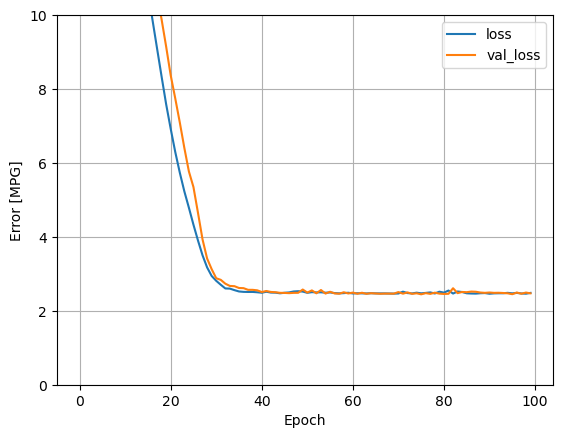

In [15]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)
plot_loss(history)

In [16]:
test_results = {}
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)
print(test_results['linear_model'])

2.4554312229156494


In [17]:
# Let's now try a DNN
def build_and_compile_model(norm):
    model = keras.Sequential([
        norm,
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
    return model
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (10, 9)                │            19 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19 (80.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 19 (80.00 B)

In [18]:
%%time
history = dnn_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 7.14 s, sys: 1.42 s, total: 8.55 s
Wall time: 7.42 s


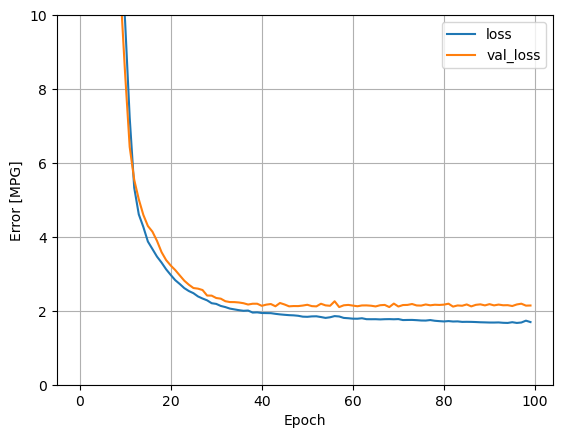

In [19]:
plot_loss(history)

In [20]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)


In [21]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
linear_model,2.455431
dnn_model,1.727506


### Let's do a classification example!
 
 Let's classify images of clothing!

In [22]:
#Import the dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [23]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
train_images.shape

(60000, 28, 28)

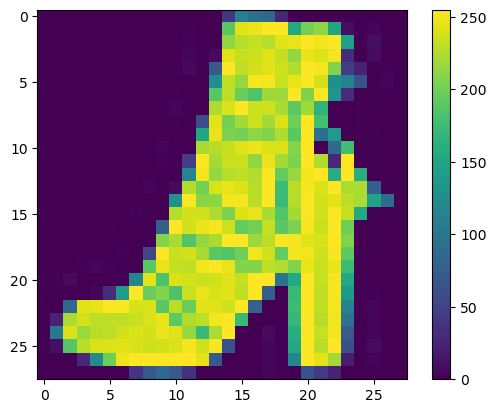

In [24]:
#Let's plot a random image
plt.figure()
plt.imshow(train_images[11])
plt.colorbar()
plt.grid(False)
plt.show()


In [25]:
# Let's normalize our data RGB channel with value range 0-255
train_images = train_images / 255.0

test_images = test_images / 255.0

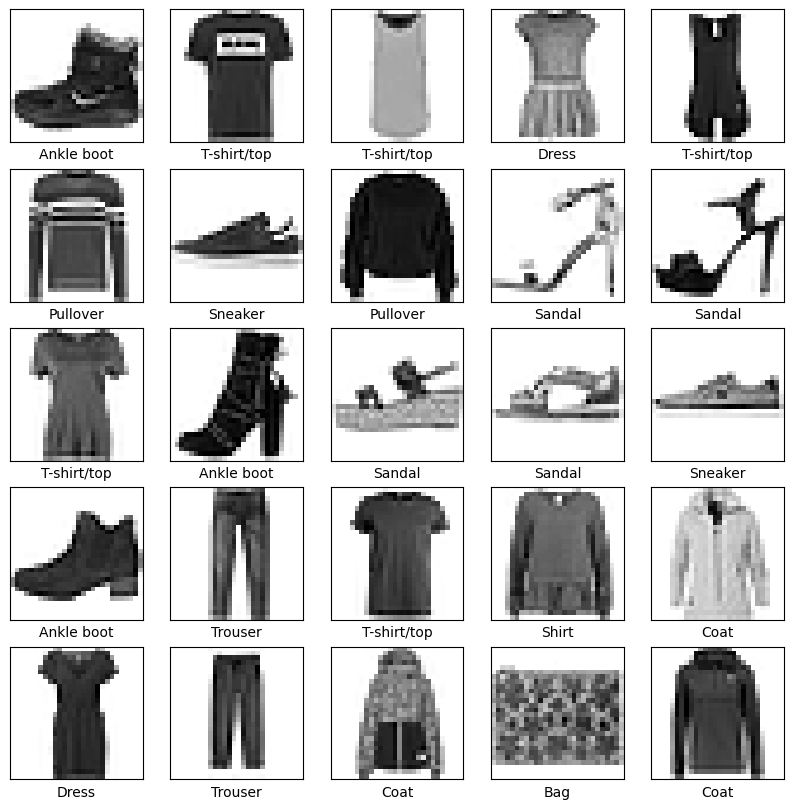

In [26]:
#Let's look at the data
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [27]:
#Now let's build the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])


/home/ubuntu/data/anaconda3/envs/mat/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
#Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [29]:
#train
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7837 - loss: 0.6179
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8619 - loss: 0.3824
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8772 - loss: 0.3423
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8862 - loss: 0.3129
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8882 - loss: 0.2981
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8958 - loss: 0.2839
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8988 - loss: 0.2699
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9054 - loss: 0.2534
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9075 - loss: 0.2506
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9095 - loss: 0.2403


In [30]:
#Let's test its accuracy!
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)


313/313 - 0s - 1ms/step - accuracy: 0.8786 - loss: 0.3420

Test accuracy: 0.878600001335144


In [31]:
#make predictions
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])


- tf.keras.layers.Softmax(): This is a Softmax activation layer, which is typically used as the final layer in a classification neural network. The Softmax function takes a vector of numerical scores (logits) and converts them into probabilities. Each score is transformed into a probability value between 0 and 1, and all the probabilities sum up to 1. This is crucial for multi-class classification tasks, as it helps in assigning class probabilities to each class.

In [32]:
predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step


In [33]:
predictions[0]

array([2.07168569e-07, 6.19294696e-08, 1.27281981e-08, 9.05709049e-11,
       1.84279134e-08, 1.71332131e-03, 1.08760936e-07, 4.16216925e-02,
       2.51271899e-07, 9.56664383e-01], dtype=float32)

In [34]:
np.argmax(predictions[0])

9

In [35]:
test_labels[0]

9

In [36]:
#ax functions
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


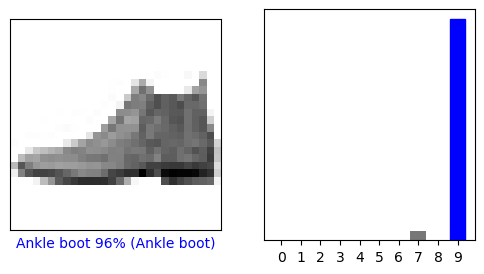

In [37]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

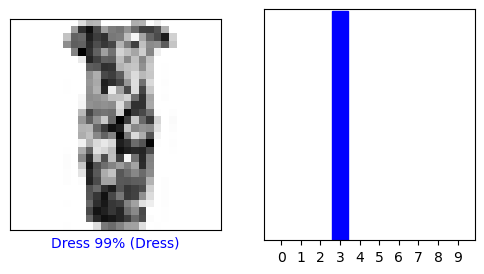

In [38]:
i = 100
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

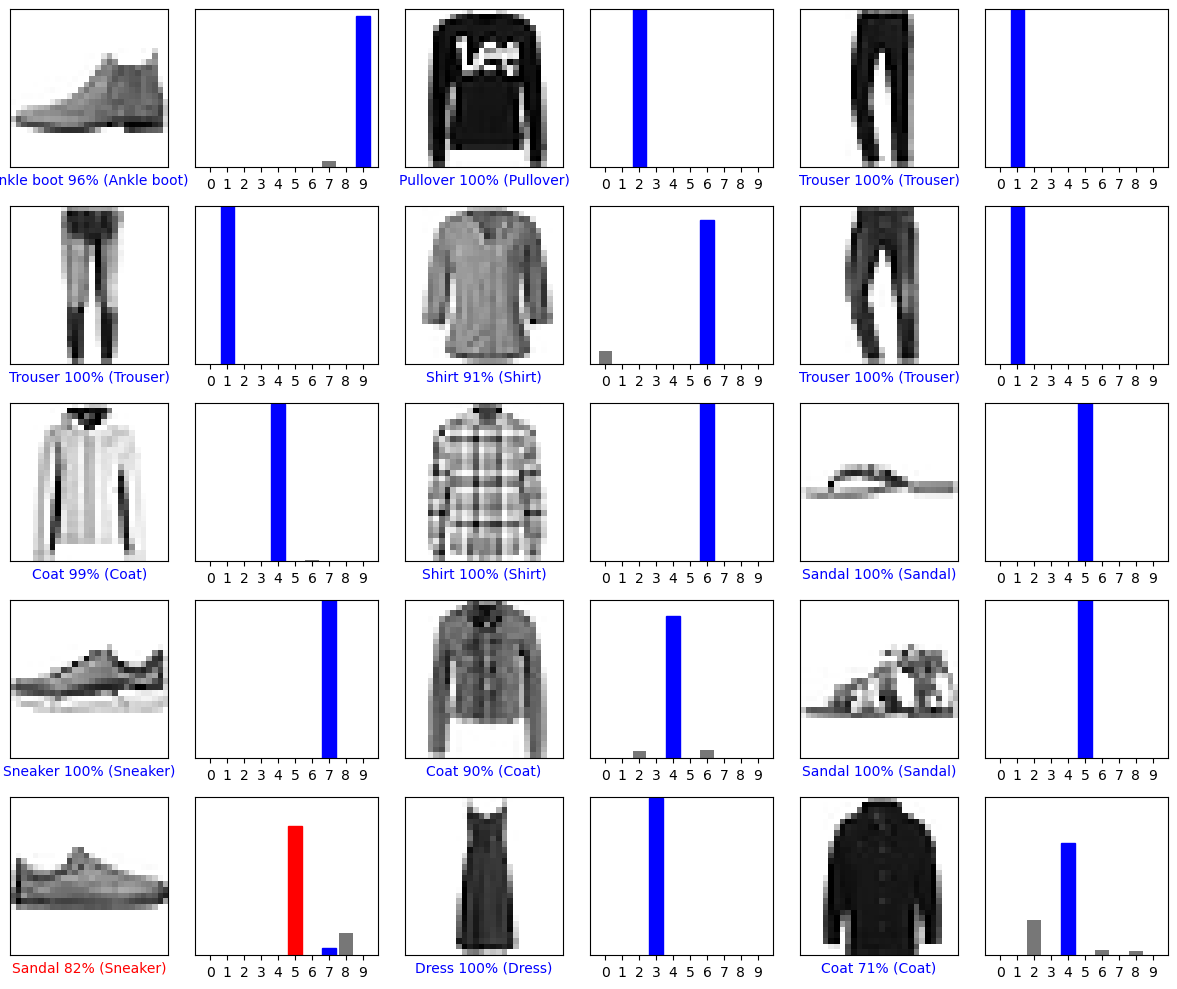

In [39]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Now let's navigate some of the options that we used!

### Layers
We used Dense above, which is just your regular densely-connected NN layer.

    ''' 
    tf.keras.layers.Dense(
    units, activation=None, use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros', kernel_regularizer=None,
    bias_regularizer=None, activity_regularizer=None, kernel_constraint=None,
    bias_constraint=None, **kwargs
    )
    '''


In [40]:
# Create a `Sequential` model and add a Dense layer as the first layer.
modell = tf.keras.models.Sequential()
modell.add(tf.keras.Input(shape=(16,)))
modell.add(tf.keras.layers.Dense(32, activation='relu'))
# Now the model will take as input arrays of shape (None, 16)
# and output arrays of shape (None, 32).
# Note that after the first layer, you don't need to specify
# the size of the input anymore:
modell.add(tf.keras.layers.Dense(32))

modell.output_shape
##The None dimension means that the model can handle varying batch sizes.

(None, 32)

In [41]:
modell.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         1,056 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,600 (6.25 KB)

 Trainable params: 1,600 (6.25 KB)

 Non-trainable params: 0 (0.00 B)

More than 30 types of layers in tensorflow, check them here! https://www.tensorflow.org/api_docs/python/tf/keras/layers

### activation functions

In [42]:
#Relu
foo = tf.constant([-10, -5, 0.0, 5, 10], dtype = tf.float32)
m=tf.keras.activations.relu(foo, negative_slope=0.0, max_value=4, threshold=0).numpy()
print(m)

[0. 0. 0. 4. 4.]


In [43]:
#elu
# x if x > 0 
# if x<0 alpha * (exp(x) - 1) 
foo = tf.constant([-10, -5, 0.0, 5, 10], dtype = tf.float32)
m=tf.keras.activations.elu(foo,alpha=10).numpy()
print(m)

[-9.999546 -9.932621  0.        5.       10.      ]


In [44]:
#tanh
# tanh(x) = sinh(x)/cosh(x) = ((exp(x) - exp(-x))/(exp(x) + exp(-x))).
foo = tf.constant([-1000, -5, 0.0, 5, 1000], dtype = tf.float32)
m=tf.keras.activations.tanh(foo).numpy()
print(m)

[-1.         -0.99990916  0.          0.99990916  1.        ]


In [45]:
#Sigmoid
# sigmoid(x) = 1 / (1 + exp(-x))
foo = tf.constant([-10000, -5, 0.0, 5, 10000], dtype = tf.float32)
m=tf.keras.activations.sigmoid(foo).numpy()
print(m)

[0.         0.00669285 0.5        0.9933072  1.        ]


For more on activation functions: https://www.tensorflow.org/api_docs/python/tf/keras/activations

### Optimizers 
Let's now go over some 

In [46]:
#Keras basic optimizer
model.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#train
model.fit(train_images, train_labels, epochs=2)

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9246 - loss: 0.2060
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9275 - loss: 0.1955


In [47]:
#RMSprop
model.compile(optimizer='RMSprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#train
model.fit(train_images, train_labels, epochs=2)

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9146 - loss: 0.2324
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9168 - loss: 0.2234


In [48]:
#Adam
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#train
model.fit(train_images, train_labels, epochs=2)

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9174 - loss: 0.2243
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9225 - loss: 0.2119


#### Learning rate scheduler

In [49]:
initial_learning_rate = 0.1
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=1,
    decay_rate=0.9,
    staircase=True)

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=3)


Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9272 - loss: 0.1904
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9307 - loss: 0.1852
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9287 - loss: 0.1886


For more on optimizers: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers

### Loss functions 
Loss functions for regression are different from that for classification

These functions greatly impact the model. Some are harder to optimiz but has a physical meaning to the problem!

Some functions on tensorflow:
class BinaryCrossentropy: Computes the cross-entropy loss between true labels and predicted labels.

<code> class CategoricalCrossentropy </code>: Computes the crossentropy loss between the labels and predictions.

<code>class CategoricalHinge</code>: Computes the categorical hinge loss between y_true and y_pred.

<code>class CosineSimilarity</code>: Computes the cosine similarity between labels and predictions.

<code>class Hinge</code>: Computes the hinge loss between y_true and y_pred.

<code>class KLDivergence</code>: Computes Kullback-Leibler divergence loss between y_true and y_pred.


<code>class MeanAbsoluteError</code>: Computes the mean of absolute difference between labels and predictions.

<code>class MeanAbsolutePercentageError</code>: Computes the mean absolute percentage error between y_true and y_pred.

<code>class MeanSquaredError</code>: Computes the mean of squares of errors between labels and predictions.

<code>class MeanSquaredLogarithmicError</code>: Computes the mean squared logarithmic error between y_true and y_pred.


<code>class SparseCategoricalCrossentropy</code>: Computes the crossentropy loss between the labels and predictions.

<code>class SquaredHinge</code>: Computes the squared hinge loss between y_true and y_pred.

In [50]:
#SparseCategoricalCrossentropy
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#train
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9205 - loss: 0.2108
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9231 - loss: 0.2024
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9256 - loss: 0.1986


In [51]:
#SparseCategoricalCrossentropy
model.compile(optimizer='adam',
              loss=tf.keras.losses.Hinge(),
              metrics=['accuracy'])
#train
train_labels_new = tf.keras.utils.to_categorical(train_labels)
model.fit(train_images, train_labels_new, epochs=2)

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9212 - loss: 0.0524
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9259 - loss: 0.0423


In [52]:
#BinaryCrossentropy (not applicable)
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])
#train
train_labels_new = tf.cast(train_labels_new, dtype=tf.float32)
model.fit(train_images, train_labels_new, epochs=2)

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8724 - loss: 0.3636
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6908 - loss: 0.8950


For more on loss functions: https://www.tensorflow.org/api_docs/python/tf/keras/losses

### Metrics 
Metrics do not impact the performance of the model or the optimization process. They are there to help you evaluate the performance of the model, but they are different from regression to calssification. 

https://www.tensorflow.org/api_docs/python/tf/keras/metrics

for example 
<code> class CategoricalHinge </code>: Computes the categorical hinge metric between y_true and y_pred.

In [53]:
#Hinge(not applicable)
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['CategoricalHinge'])
#train
model.fit(train_images, train_labels_new, epochs=1)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - CategoricalHinge: 195.2638 - loss: 7.8004


In [54]:
#(not useful)
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['MeanSquaredError'])
#train
model.fit(train_images, train_labels_new, epochs=1)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - MeanSquaredError: 12082.9717 - loss: 11.2167


References:
    - François Chollet
    - Tensorflow.org